In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from numpy import floor
format = 2


batter = 'Jos Buttler'
bowler = 'Pat Cummins'
url = "http://www.cricmetric.com/matchup.py?batsman=" + batter.replace(' ', '+') + "&bowler=" + bowler.replace(' ', '+')
response = requests.get(url)

if response.status_code == 200:
    html_content = response.content
else:
    print("Failed to retrieve the webpage")

soup = BeautifulSoup(html_content, "html.parser")
tables = soup.find_all("table")

dataframes = []
for table in tables:
    df = pd.read_html(str(table))[0]
    dataframes.append(df)

merged_df = pd.concat(dataframes).groupby('Year').sum(numeric_only=True).reset_index()
merged_df['SR'] = (merged_df['Runs'] / merged_df['Balls'] * 100).round(2)
# merged_df['Avg'] = '-'
merged_df


,Year,Runs,Balls,Outs,Dots,4s,6s,SR
0,2015,3,5,0,2,0,0,60.00
1,2017,1,4,0,3,0,0,25.00
2,2018,32,26,0,13,2,2,123.08
3,2019,42,146,5,124,5,0,28.77
4,2020,38,37,1,19,5,1,102.70
5,2021,16,22,0,15,1,0,72.73
6,2022,48,50,4,28,5,1,96.00
7,Total,180,290,10,204,18,4,62.07


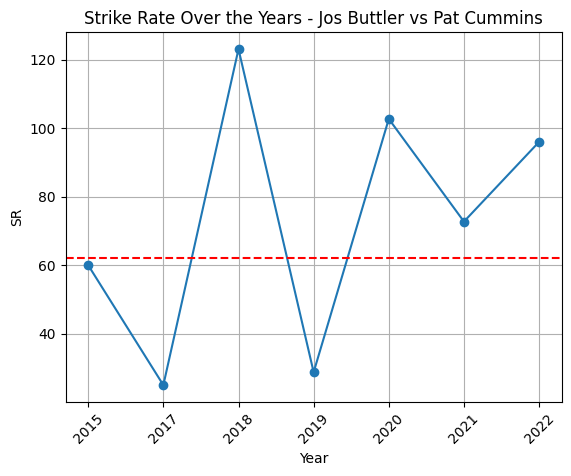

In [ ]:
filtered_df = merged_df[merged_df['Year'] != 'Total']
plt.plot(filtered_df['Year'], filtered_df['SR'], marker='o')
plt.axhline(y=merged_df.loc[merged_df['Year'] == 'Total', 'SR'].values[0], color='red', linestyle='--')  # Add a red line at the 'Total' SR value
plt.xlabel('Year')
plt.ylabel('SR')
plt.title('Strike Rate Over the Years - Jos Buttler vs Pat Cummins')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()